In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from scipy.stats import chi2_contingency

In [2]:
request = pd.read_csv("C:/Users/HP/Desktop/311 NYC service request.csv")

D:\Vibha\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
request.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [4]:
request.shape

(300698, 53)

In [5]:
# The columns with more null values can be removed 

request.drop(['Intersection Street 1', 'Intersection Street 2', 'Landmark', 'School or Citywide Complaint', 'Vehicle Type',
              'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
              'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name'],
               axis=1, inplace=True)

In [6]:
request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [7]:
request = request.dropna()

In [8]:
for column in request.columns:
     print("\n" + column)
     print(request[column].value_counts())


Unique Key
31461374    1
32131359    1
30636345    1
31682872    1
32180535    1
           ..
30579704    1
31126517    1
31638515    1
31640562    1
31461378    1
Name: Unique Key, Length: 245664, dtype: int64

Created Date
11-01-2015 22:12          8
07-11-2015 23:04          8
11-06-2015 23:34          8
05-05-2015 21:20          8
06-06-2015 22:23          7
                         ..
10/20/2015 07:45:09 PM    1
09/15/2015 12:23:56 AM    1
10-02-2015 17:18          1
09-12-2015 01:03          1
07/21/2015 06:24:58 PM    1
Name: Created Date, Length: 216624, dtype: int64

Closed Date
10-11-2015 07:03          20
11-08-2015 07:34          19
05-10-2015 07:01          17
12-07-2015 23:17          17
12-08-2015 07:44          16
                          ..
09-11-2015 10:12           1
09/19/2015 03:20:50 AM     1
12/20/2015 12:06:22 AM     1
07/20/2015 02:06:20 AM     1
05-09-2015 18:13           1
Name: Closed Date, Length: 200362, dtype: int64

Agency
NYPD    245664
Name: Agency,

10-11-2015 07:03          20
11-08-2015 07:34          19
12-07-2015 23:17          17
05-10-2015 07:01          17
12-08-2015 07:44          16
                          ..
09/13/2015 05:06:24 PM     1
04-04-2015 07:52           1
08/14/2015 03:11:16 PM     1
09-01-2015 14:18           1
04/30/2015 12:34:39 AM     1
Name: Resolution Action Updated Date, Length: 200960, dtype: int64

Community Board
12 MANHATTAN    10576
01 BROOKLYN      8676
05 QUEENS        7879
01 QUEENS        7828
09 QUEENS        7169
                ...  
84 QUEENS           6
82 QUEENS           5
27 BRONX            5
80 QUEENS           3
83 QUEENS           1
Name: Community Board, Length: 70, dtype: int64

Borough
BROOKLYN         84197
QUEENS           68237
MANHATTAN        48429
BRONX            34518
STATEN ISLAND    10283
Name: Borough, dtype: int64

X Coordinate (State Plane)
1021327.0    910
1000311.0    563
1037000.0    507
985450.0     311
935996.0     311
            ... 
1008495.0      1
1008496.

In [9]:
# Since all the school details and Park Facility Name are unspecified, those columns can be removed
# Also the columns Borough and Park Borough are same, hence one of them can be removed

request.drop(['School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Park Facility Name', 'Park Borough'], axis=1, inplace=True)

In [10]:
request['Created Date'] = pd.to_datetime(request['Created Date'])      

request['Closed Date'] = pd.to_datetime(request['Closed Date'])

request['Request_Closing_Time'] = request['Closed Date'] - request['Created Date']

In [11]:
request.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Latitude', 'Longitude', 'Location',
       'Request_Closing_Time'],
      dtype='object')

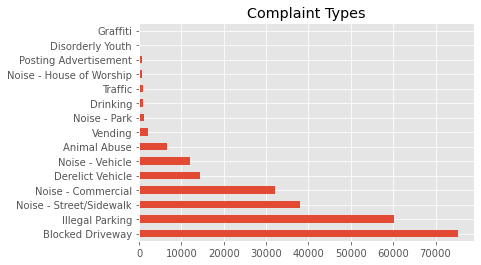

In [12]:
request['Complaint Type'].value_counts().plot(kind='barh')
plt.title('Complaint Types');

From the above plot, we can conclude that Blocked Driveway is the highest complaint type and Graffiti, Disorderly Youth the least ones

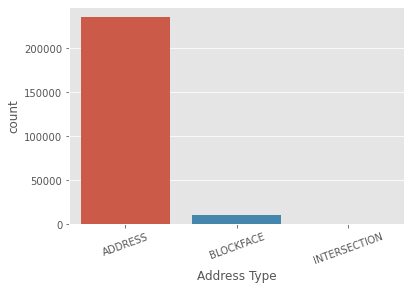

In [13]:
plot = sns.countplot(x='Address Type', data=request)
plot.set_xticklabels(plot.get_xticklabels(), rotation=20);

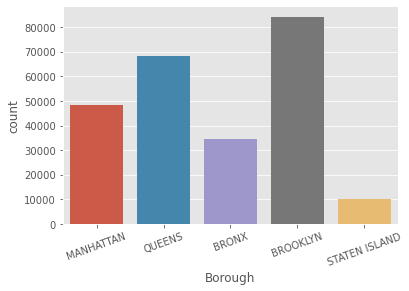

In [14]:
plot = sns.countplot(x='Borough', data=request)
plot.set_xticklabels(plot.get_xticklabels(), rotation=20);

From the above plot, we can conclude that Brooklyn is the borough for most people and Staten Island is the borough for fewer people.

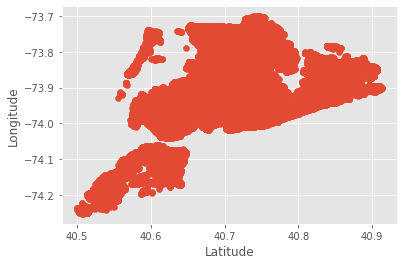

In [15]:
plt.scatter(request['Latitude'], request['Longitude'])
plt.xlabel('Latitude')
plt.ylabel('Longitude');

The above plot shows the areas with most complaints

In [16]:
request.groupby(['Complaint Type', 'Location']).mean()

Unique Key  \
Complaint Type Location                                               
Animal Abuse   (40.50004910779944, -74.238033510764)     30620141.0   
               (40.50062125381004, -74.24398645134252)   31386225.0   
               (40.50302866584165, -74.24773850760648)   32241748.0   
               (40.5031739359226, -74.24008707720584)    31432908.0   
               (40.507410938581195, -74.24446792971145)  31871900.0   
...                                                             ...   
Vending        (40.88877338313342, -73.8428799207527)    31579530.0   
               (40.89211042428524, -73.84051382708081)   31213916.0   
               (40.89369402426965, -73.85722041111605)   31491838.0   
               (40.894781070976705, -73.84056167467809)  30843386.0   
               (40.90117643869534, -73.84682971124454)   30588073.0   

                                                         Incident Zip  \
Complaint Type Location                                                 
Animal Abuse   (40.50004910779944, -74.238033510764)          10307.0   
               (40.50062125381004, -74.24398645134252)        10307.0   
               (40.50302866584165, -74.24773850760648)        10307.0   
               (40.5031739359226, -74.24008707720584)         10307.0   
               (40.507410938581195, -74.24446792971145)       10307.0   
...                                                               ...   
Vending        (40.88877338313342, -73.8428799207527)         10466.0   
               (40.89211042428524, -73.84051382708081)        10466.0   
               (40.89369402426965, -73.85722041111605)        10466.0   
               (40.894781070976705, -73.84056167467809)       10466.0   
               (40.90117643869534, -73.84682971124454)        10466.0   

                                                         X Coordinate (State Plane)  \
Complaint Type Location                                                               
Animal Abuse   (40.50004910779944, -74.238033510764)                       918050.0   
               (40.50062125381004, -74.24398645134252)                     916395.0   
               (40.50302866584165, -74.24773850760648)                     915354.0   
               (40.5031739359226, -74.24008707720584)                      917482.0   
               (40.507410938581195, -74.24446792971145)                    916268.0   
...                                                                             ...   
Vending        (40.88877338313342, -73.8428799207527)                     1027693.0   
               (40.89211042428524, -73.84051382708081)                    1028345.0   
               (40.89369402426965, -73.85722041111605)                    1023725.0   
               (40.894781070976705, -73.84056167467809)                   1028330.0   
               (40.90117643869534, -73.84682971124454)                    1026593.0   

                                                         Y Coordinate (State Plane)  \
Complaint Type Location                                                               
Animal Abuse   (40.50004910779944, -74.238033510764)                       121548.0   
               (40.50062125381004, -74.24398645134252)                     121761.0   
               (40.50302866584165, -74.24773850760648)                     122641.0   
               (40.5031739359226, -74.24008707720584)                      122688.0   
               (40.507410938581195, -74.24446792971145)                    124235.0   
...                                                                             ...   
Vending        (40.88877338313342, -73.8428799207527)                      263121.0   
               (40.89211042428524, -73.84051382708081)                     264338.0   
               (40.89369402426965, -73.85722041111605)                     264907.0   
               (40.894781070976705, -73.84056167467809)                    265311.0   
       

In [17]:
# To check whether the average response time across complaint types is similar or not

# Null hypothesis: The average response time across complaint types is not similar
# Alternate hypothesis: The average response time across complaint types is similar

contingency_table1 = pd.crosstab(request['Request_Closing_Time'], request['Complaint Type'])
stat, p, dof, expected = chi2_contingency(contingency_table1)
print('p = %.3f' %p)
if p > 0.05:
    print('The average response time across complaint types is not similar')
else:
    print('The average response time across complaint types is similar')

p = 1.000
The average response time across complaint types is not similar


In [18]:
# To check whether the type of complaint or service requested and location are related

# Null hypothesis: The type of complaint and location are not related
# Alternate hypothesis: The type of complaint and location are related

contingency_table2 = pd.crosstab(request['Complaint Type'], request['Location'])
stat, p, dof, expected = chi2_contingency(contingency_table2)
print('p = %.3f' %p)
if p > 0.05:
    print('The type of complaint and location are not related')
else:
    print('The type of complaint and location are related')


p = 0.000
The type of complaint and location are related
